In [ ]:

!pip install -q --upgrade pip
!pip install -q kaggle opendatasets lifetimes scikit-learn xgboost seaborn
!pip install -q pandas openpyxl



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [lifetimes]


In [ ]:
from google.colab import files
import os

uploaded = files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:

!kaggle datasets download -d lakshmi25npathi/online-retail-dataset --unzip -p /content


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset
License(s): other
  0% 0.00/43.3M [00:00<?, ?B/s]
100% 43.3M/43.3M [00:00<00:00, 1.33GB/s]


In [ ]:
import pandas as pd

file_path = '/content/online_retail_II.xlsx'

xls = pd.ExcelFile(file_path)
df_2009 = pd.read_excel(xls, sheet_name='Year 2009-2010')
df_2010 = pd.read_excel(xls, sheet_name='Year 2010-2011')

# Combine both years
data = pd.concat([df_2009, df_2010], ignore_index=True)


In [ ]:
# View
print("Shape:", data.shape)
print("Columns:", data.columns)

# Check
print("\nInfo:")
print(data.info())

# missing values
print("\nMissing values per column:")
print(data.isnull().sum())


Shape: (1067371, 8)
Columns: Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB
None

Missing values per column:
Invoice             0
StockCode           0
Description      4382
Quantity            0
I

In [ ]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
data.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


In [ ]:
print("Total unique customers:", data['Customer ID'].nunique())

print("\nTop 5 most sold products:")
print(data['Description'].value_counts().head())


Total unique customers: 5942

Top 5 most sold products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    5918
REGENCY CAKESTAND 3 TIER              4412
JUMBO BAG RED RETROSPOT               3469
ASSORTED COLOUR BIRD ORNAMENT         2958
PARTY BUNTING                         2765
Name: count, dtype: int64


In [ ]:
print("\nTop 5 countries by order count:")
print(data['Country'].value_counts().head())



Top 5 countries by order count:
Country
United Kingdom    981330
EIRE               17866
Germany            17624
France             14330
Netherlands         5140
Name: count, dtype: int64


In [ ]:
# Total revenue
data['TotalPrice'] = data['Quantity'] * data['Price']
print(f"\nTotal Marketplace Revenue: £{data['TotalPrice'].sum():,.2f}")



Total Marketplace Revenue: £19,287,250.57


In [ ]:
# Remove rows with missing Customer ID
data_cleaned = data.dropna(subset=['Customer ID'])

# Filter out rows with abnormal/invalid Quantity or Price
data_cleaned = data_cleaned[(data_cleaned['Quantity'] > 0) & (data_cleaned['Price'] > 0)]

# Convert Customer ID to int (after dropping nulls)
data_cleaned['Customer ID'] = data_cleaned['Customer ID'].astype(int)

# Create TotalAmount column
data_cleaned['TotalAmount'] = data_cleaned['Quantity'] * data_cleaned['Price']

data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

# Confirm clean structure
print("Cleaned dataset shape:", data_cleaned.shape)
print("Missing values after cleaning:")
print(data_cleaned.isnull().sum())

# Preview cleaned dataset
data_cleaned.head()


Cleaned dataset shape: (805549, 10)
Missing values after cleaning:
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
TotalAmount    0
dtype: int64


/tmp/ipython-input-11-1450307553.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Customer ID'] = data_cleaned['Customer ID'].astype(int)
/tmp/ipython-input-11-1450307553.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['TotalAmount'] = data_cleaned['Quantity'] * data_cleaned['Price']
/tmp/ipython-input-11-1450307553.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,30.0


In [ ]:
# Number of unique customers
print(" Unique customers:", data_cleaned['Customer ID'].nunique())

# Sanity check: No negative values
print("\nNegative quantities exist?", (data_cleaned['Quantity'] < 0).any())
print("Negative prices exist?", (data_cleaned['Price'] < 0).any())


 Unique customers: 5878

Negative quantities exist? False
Negative prices exist? False


Feature Engineering

In [ ]:
cutoff_date = pd.Timestamp('2011-06-01')

historical = data_cleaned[data_cleaned['InvoiceDate'] < cutoff_date]


In [ ]:
import pandas as pd
import datetime as dt

# Used cleaned data
snapshot_date = historical['InvoiceDate'].max() + dt.timedelta(days=1)
print("Snapshot date:", snapshot_date)


Snapshot date: 2011-06-01 15:41:00


In [ ]:
#Recency: Number of days since last purchase up to the snapshot date.
#Frequency: Number of unique invoices per customer.
#Monetary: Total amount spent by the customer.

rfm = (
    historical
    .groupby('Customer ID')
    .agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,    # Recency
        'Invoice': 'nunique',                                      # Frequency
        'TotalAmount': 'sum',                                      # Monetary
    })
    .reset_index()
    .rename(columns={
        'InvoiceDate': 'Recency',
        'Invoice': 'Frequency',
        'TotalAmount': 'Monetary'
    })
)

rfm.head()


,Customer ID,Recency,Frequency,Monetary
0,12346,134,12,77556.46
1,12347,55,4,3146.75
2,12348,57,4,1709.40
3,12349,216,3,2671.14
4,12350,118,1,334.40


In [ ]:
print("Recency (days):")
print(rfm['Recency'].describe())

print("\nFrequency (number of invoices):")
print(rfm['Frequency'].describe())

print("\nMonetary (total spend):")
print(rfm['Monetary'].describe())


Recency (days):
count    4933.000000
mean      169.559295
std       141.919538
min         1.000000
25%        44.000000
50%       161.000000
75%       244.000000
max       547.000000
Name: Recency, dtype: float64

Frequency (number of invoices):
count    4933.000000
mean        5.239408
std        10.132239
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       258.000000
Name: Frequency, dtype: float64

Monetary (total spend):
count      4933.000000
mean       2465.962951
std       10907.752454
min           2.900000
25%         317.600000
50%         774.870000
75%        2001.070000
max      413806.460000
Name: Monetary, dtype: float64


In [ ]:
future = data_cleaned[data_cleaned['InvoiceDate'] >= cutoff_date]

future_clv = (
    future.groupby('Customer ID')['TotalAmount']
    .sum()
    .reset_index()
    .rename(columns={'TotalAmount': 'Future_CLV'})
)

In [ ]:
rfm = pd.merge(rfm, future_clv, on='Customer ID', how='left').fillna({'Future_CLV': 0})

In [ ]:
import numpy as np


In [ ]:
rfm['Recency_log'] = np.log1p(rfm['Recency'])
rfm['Frequency_log'] = np.log1p(rfm['Frequency'])
rfm['Monetary_log'] = np.log1p(rfm['Monetary'])
rfm['Future_CLV_log'] = np.log1p(rfm['Future_CLV'])

In [ ]:
features = ['Recency_log', 'Frequency_log', 'Monetary_log']
target = 'Future_CLV_log'

X = rfm[features]
y = rfm[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (3699, 3)
Test size: (1234, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

lr = LinearRegression().fit(X_train_scaled, y_train)
rf = RandomForestRegressor(n_estimators=300, random_state=42).fit(X_train_scaled, y_train)
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6,
                   subsample=0.8, random_state=42).fit(X_train_scaled, y_train)
mlp = MLPRegressor(hidden_layer_sizes=(64,32), max_iter=400, random_state=42).fit(X_train_scaled, y_train)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate(model, Xtr, ytr, Xte, yte):
    train_pred = model.predict(Xtr)
    test_pred = model.predict(Xte)
    return {
        'RMSE_train': np.sqrt(mean_squared_error(ytr, train_pred)),
        'RMSE_test': np.sqrt(mean_squared_error(yte, test_pred)),
        'MAE_test': mean_absolute_error(yte, test_pred),
        'R2_test': r2_score(yte, test_pred)
    }

results = pd.DataFrame({
    'Linear Regression': evaluate(lr, X_train_scaled, y_train, X_test_scaled, y_test),
    'Random Forest': evaluate(rf, X_train_scaled, y_train, X_test_scaled, y_test),
    'XGBoost': evaluate(xgb, X_train_scaled, y_train, X_test_scaled, y_test),
    'Neural Network': evaluate(mlp, X_train_scaled, y_train, X_test_scaled, y_test)
}).T

print("\nModel Performance:")
print(results)



Model Performance:
                   RMSE_train  RMSE_test  MAE_test   R2_test
Linear Regression    2.688306   2.711208  2.318041  0.355421
Random Forest        1.049915   2.839459  2.274044  0.292996
XGBoost              1.841104   2.782478  2.246656  0.321087
Neural Network       2.590605   2.633257  2.212117  0.391953


In [ ]:

X_full_scaled = scaler.transform(rfm[features])
rfm['Predicted_Future_CLV_log'] = rf.predict(X_full_scaled)
rfm['Predicted_Future_CLV'] = np.expm1(rfm['Predicted_Future_CLV_log'])

In [ ]:
def segment(row):
    if row['Recency'] <= 30 and row['Predicted_Future_CLV'] > 4000:
        return 'Champions'
    if row['Frequency'] >= 10 and row['Predicted_Future_CLV'] > 2500:
        return 'Loyal Customers'
    if row['Recency'] > 90 and row['Predicted_Future_CLV'] > 3000:
        return 'At Risk'
    if row['Recency'] > 120 and row['Predicted_Future_CLV'] < 1000:
        return 'Lost Customers'
    return 'Others'

rfm['Segment'] = rfm.apply(segment, axis=1)


In [ ]:
print("\nCustomer segment counts:")
print(rfm['Segment'].value_counts())

print("\nSegment CLV summary:")
print(rfm.groupby('Segment')['Predicted_Future_CLV'].agg(['count', 'sum', 'mean']).sort_values('sum', ascending=False))




Customer segment counts:
Segment
Lost Customers     2660
Others             2082
Loyal Customers     100
Champions            90
At Risk               1
Name: count, dtype: int64

Segment CLV summary:
                 count           sum          mean
Segment                                           
Champions           90  1.567292e+06  17414.356779
Others            2082  9.762960e+05    468.922175
Loyal Customers    100  3.260538e+05   3260.538435
Lost Customers    2660  1.452001e+05     54.586498
At Risk              1  7.944073e+03   7944.072987


In [ ]:
rfm.reset_index(drop=True)[['Customer ID', 'Recency', 'Frequency', 'Monetary', 'Future_CLV', 'Predicted_Future_CLV', 'Segment']] \
    .to_csv('customer_clv_predictions.csv', index=False)

print("\nSaved customer CLV predictions to 'customer_clv_predictions.csv'")


Saved customer CLV predictions to 'customer_clv_predictions.csv'


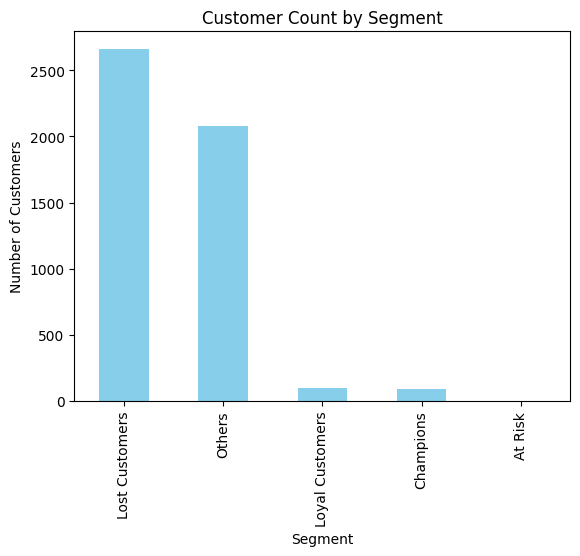

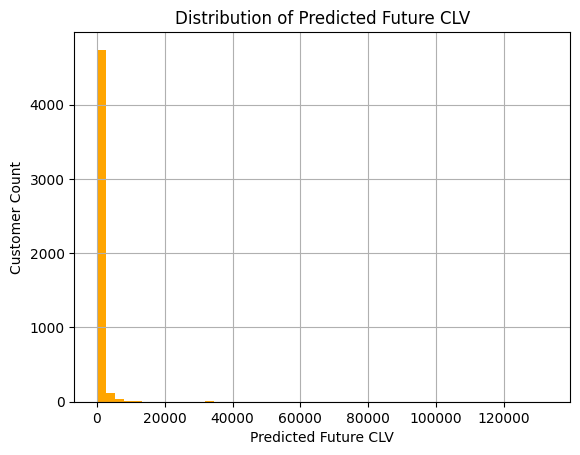

In [ ]:
import matplotlib.pyplot as plt

rfm['Segment'].value_counts().plot(kind='bar', title='Customer Count by Segment', color='skyblue')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

rfm['Predicted_Future_CLV'].hist(bins=50, color='orange')
plt.title('Distribution of Predicted Future CLV')
plt.xlabel('Predicted Future CLV')
plt.ylabel('Customer Count')
plt.show()